In [1]:
import numpy as np
import pandas as pd
import json
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
import uncertainties.unumpy as unp
import uncertainties as unc

### Functions

In [3]:
def powerlaw(x, amplitude, exponent):
    return amplitude * x**(exponent)

In [4]:
def exponential(x, amplitude, tau):
    return amplitude * np.exp(x/tau)

In [38]:
def gauss(x, amplitude, mean, sigma):
    return amplitude*np.exp(-(x-mean)**2/(2*sigma**2))

### Import

In [49]:
dfr = pd.read_json('../dati-json/dpc-covid19-ita-regioni.json')
dfp = pd.read_json('../dati-json/dpc-covid19-ita-province.json')
df = pd.read_json('../dati-json/dpc-covid19-ita-andamento-nazionale.json')

In [50]:
dfp[dfp.denominazione_provincia == 'Bergamo'].tail()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
1456,2020-03-06 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,623
1584,2020-03-07 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,761
1712,2020-03-08 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,997
1840,2020-03-09 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,1245
1968,2020-03-10 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,1472


In [51]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
11,2020-03-06 18:00:00,ITA,2394,462,2856,1060,3916,620,523,197,4636,36359
12,2020-03-07 18:00:00,ITA,2651,567,3218,1843,5061,1145,589,233,5883,42062
13,2020-03-08 18:00:00,ITA,3557,650,4207,2180,6387,1326,622,366,7375,49937
14,2020-03-09 18:00:00,ITA,4316,733,5049,2936,7985,1598,724,463,9172,53826
15,2020-03-10 18:00:00,ITA,5038,877,5915,2599,8514,529,1004,631,10149,60761


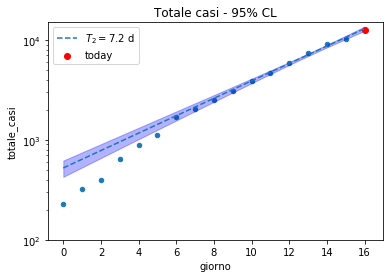

In [56]:
fig, ax = plt.subplots()

x = np.arange(len(df))
px = np.arange(len(df)*2)
dd = 6

df.reset_index().plot.scatter(x='index',y='totale_casi', ax = ax, logy = True, title = 'Totale casi - 95% CL', ylim=[10**2,1.5*10**4])

popt, pcov = optimize.curve_fit(exponential, x[dd:], df.totale_casi[dd:])
y0,tau = unc.correlated_values(popt, pcov)
px = px[:17]
py = y0*unp.exp(px/tau)
nom = unp.nominal_values(py)
std = unp.std_devs(py)

ax.fill_between(px, nom + 1.96 * std, nom - 1.96 * std, alpha = 0.3, color = 'blue')

label = r'$T_2=$'+str(round(popt[1]/np.log(2),1))+ r' d'
ax.plot(px[:17],exponential(px[:17], *popt), ls = '--', label = label)

#ax.scatter(16, exponential(16, *popt), color = 'red')
ax.scatter(16,12462, color = 'red', label = 'today')

ax.set_xlabel('giorno')
ax.legend()
fig.savefig('plot/totale_casi.png', dpi = 300)

In [26]:
dfp[dfp.sigla_provincia == provincia].reset_index().reset_index().head()

,level_0,index,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,0,48,2020-02-24 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,0
1,1,176,2020-02-25 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,18
2,2,304,2020-02-26 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,20
3,3,432,2020-02-27 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,72
4,4,560,2020-02-28 18:00:00,ITA,3,Lombardia,16,Bergamo,BG,45.694414,9.668425,103


### Province

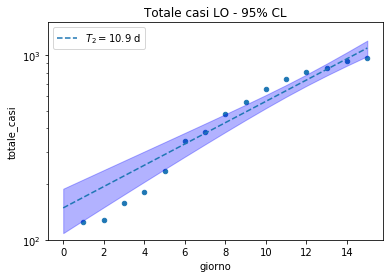

In [44]:
provincia = 'LO'

fig, ax = plt.subplots()

x = np.arange(16)
px = np.arange(18)
dd = 0

dfp[dfp.sigla_provincia == provincia].reset_index().reset_index().plot.scatter(x='level_0',y='totale_casi', ax = ax, logy = True, title = 'Totale casi {} - 95% CL'.format(provincia), ylim=[10**2,1.5*10**3])

popt, pcov = optimize.curve_fit(exponential, x[dd:], dfp[dfp.sigla_provincia == provincia].totale_casi[dd:])
y0,tau = unc.correlated_values(popt, pcov)
px = px[:16]
py = y0*unp.exp(px/tau)
nom = unp.nominal_values(py)
std = unp.std_devs(py)

ax.fill_between(px, nom + 1.96 * std, nom - 1.96 * std, alpha = 0.3, color = 'blue')

label = r'$T_2=$'+str(round(popt[1]/np.log(2),1))+ r' d'
ax.plot(px[:16],exponential(px[:16], *popt), ls = '--', label = label)

#poptg, pcovg = optimize.curve_fit(gauss, x[:], dfp[dfp.sigla_provincia == provincia].totale_casi[:], p0=[1000,20,7])
#ax.plot(px[:16],gauss(px[:16], *poptg), ls = '--', label = 'gauss', color = 'red')

#ax.scatter(14, exponential(14, *popt), color = 'red')

ax.set_xlabel('giorno')
ax.legend()
fig.savefig('plot/totale_casi_{}.png'.format(provincia), dpi = 300)